In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
#지진해일 대피장소 data
# XML 데이터를 가져오기 위한 요청 설정
service_key = 'mwomjlIWqcy1kXY9c3tcT8s7lobXokh4tnki7vMVgD4qjX+k2yfZR+nLzbEsGgfDhxg6ShX4h7/6eCqJpajr5g=='
url = 'http://apis.data.go.kr/1741000/TsunamiShelter3/getTsunamiShelter1List'
params = {'serviceKey': service_key, 'pageNo': '', 'numOfRows': '654', 'type': 'xml'}
response = requests.get(url, params=params)
xml_data = response.content

# XML 데이터 파싱
root = ET.fromstring(xml_data)
rows = root.findall('.//row')

# 추출한 데이터를 저장할 리스트
data = []

# XML 데이터에서 필요한 필드 추출
for row in rows:
    record = {}
    for element in row.iter():
        record[element.tag] = element.text
    data.append(record)

# 데이터프레임 생성
df = pd.DataFrame(data)
del df['row']
del df['id']
del df['remarks']
df=df.drop(['lenth','shel_div_type'],axis=1)
df=df.sort_values(by=['sido_name','sigungu_name'])
df.to_csv('csv_file\\대피소.csv', index=False, encoding='utf-8')


In [2]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
# 옥외 대피장소 data
# XML 데이터를 가져오기 위한 요청 설정
service_key = 'mwomjlIWqcy1kXY9c3tcT8s7lobXokh4tnki7vMVgD4qjX+k2yfZR+nLzbEsGgfDhxg6ShX4h7/6eCqJpajr5g=='
url = 'http://apis.data.go.kr/1741000/EmergencyAssemblyArea_Earthquake2/getArea1List'
params = {'serviceKey': service_key, 'pageNo': '1', 'numOfRows': '1000', 'type': 'xml'}
response = requests.get(url, params=params)
xml_data = response.content

# XML 데이터 파싱
root = ET.fromstring(xml_data)
total_count = int(root.find('.//totalCount').text)  # 전체 데이터 수
page_count = (total_count // 1000) + 1  # 페이지 수 계산

# 추출한 데이터를 저장할 리스트
data = []

# 페이지를 순차적으로 변경하면서 데이터 가져오기
for page in range(1, page_count + 1):
    params['pageNo'] = str(page)  # 페이지 번호 설정
    response = requests.get(url, params=params)
    xml_data = response.content

    # XML 데이터 파싱
    root = ET.fromstring(xml_data)
    rows = root.findall('.//row')

    # XML 데이터에서 필요한 필드 추출
    for row in rows:
        record = {}
        for element in row.iter():
            record[element.tag] = element.text
        data.append(record)
print(data)
# 데이터프레임 생성
df1 = pd.DataFrame(data)
del df1['row']
del df1['arcd']
del df1['acmdfclty_sn']
df1=df1.drop(['bdong_cd','hdong_cd'],axis=1)
df1 = df1.sort_values(by=['ctprvn_nm', 'sgg_nm'])
df1['rdnmadr_cd'] = df1['rdnmadr_cd'].str[:5]
df1 = df1.rename(columns={'ctprvn_nm':'sido_name','sgg_nm':'sigungu_name','vt_acmdfclty_nm':'shel_nm','xcord':'lon','ycord':'lat','dtl_adres':'address'})
df1.to_csv('csv_file\\d.csv', index=False, encoding='utf-8')
df1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,sido_name,sigungu_name,shel_nm,rdnmadr_cd,address,fclty_ar,lon,lat
1586,강원특별자치도,강릉시,옥계초등학교,42150,강원특별자치도 강릉시 옥계면 현내리 344-1,10000,129.03510240250688,37.61050834984292
1587,강원특별자치도,강릉시,사천초등학교,42150,강원특별자치도 강릉시 사천면 미노리 406-0,8052,128.850647022792,37.8219235118247
1588,강원특별자치도,강릉시,연곡초등학교,42150,강원특별자치도 강릉시 연곡면 동덕리 959-0,16563,128.829235701456,37.8568130246344
1596,강원특별자치도,강릉시,왕산초등학교,42150,강원특별자치도 강릉시 왕산면 도마리 595-0,7179,128.836145008418,37.6734165886603
1597,강원특별자치도,강릉시,구정초등학교,42150,강원특별자치도 강릉시 구정면 학산리 393-0,12065,128.891387595211,37.7175835666904
...,...,...,...,...,...,...,...,...
9650,충청북도,충주시,칠금4호 공원,43130,충청북도 충주시 칠금동 965-0,3500,127.920599,36.981482
9651,충청북도,충주시,남양공원,43130,충청북도 충주시 연수동 929-0,6700,127.931613,36.985609
9652,충청북도,충주시,연수초등학교 운동장,43130,충청북도 충주시 연수동 1232-0,2600,127.938369,36.987486
9653,충청북도,충주시,목행초등학교 운동장,43130,충청북도 충주시 목행동 577-1,4750,127.918588,37.007322


In [3]:
# DataFrame을 추가
# 지역 코드 할당 안된 지역 할당 & 두 대피소 data 합치기
import pandas as pd
import re
df2 = pd.concat([df1, df], ignore_index=False)
df2 = df2.sort_values(by=['sido_name','sigungu_name'])
df2 = df2.drop_duplicates(subset=['lon', 'lat','shel_nm'])
df2 = df2.rename(columns={'rdnmadr_cd':'SIG_CD'})
df2 = df2[df2['shel_nm'].astype(bool)]
df2 = df2.sort_values(by=['sido_name', 'sigungu_name','SIG_CD'])
df2.loc[df2['sigungu_name'] == '연천군', 'SIG_CD'] = 41800
df2.loc[df2['sigungu_name'] == '창녕군', 'SIG_CD'] = 48740
df2.loc[df2['sigungu_name'] == '미추홀구', 'SIG_CD'] = 28177
df2.loc[df2['sigungu_name'] == '청주시 서원구', 'SIG_CD'] = 43112
df2.loc[df2['sigungu_name'] == '청주시 상당구', 'SIG_CD'] = 43111
df2.loc[df2['sigungu_name'] == '청주시 흥덕구', 'SIG_CD'] = 43113
df2.loc[df2['sigungu_name'] == '청주시 청원구', 'SIG_CD'] = 43114
df2['SIG_CD'].fillna(method='ffill', inplace=True)

df2.to_csv('csv_file\\shelterloc.csv', index=False, encoding='utf-8')
df2


,sido_name,sigungu_name,shel_nm,SIG_CD,address,fclty_ar,lon,lat,shel_av,seismic,height
67,강원도,강릉시,씨마크호텔,NaN,강원도 강릉시 강문동 274-1,NaN,128.91539400,37.79799200,700,1등급,26
68,강원도,강릉시,세인트컨벤션웨딩홀,NaN,강원도 강릉시 성덕동 42,NaN,128.94970900,37.76512600,1870,2등급,12
72,강원도,강릉시,현대아파트 앞 야산,NaN,강원도 강릉시 경포동 산10,NaN,128.89958800,37.80132800,2000,None,10
74,강원도,강릉시,송정해변 신도브래뉴아파트,NaN,강원도 강릉시 송정동 289,NaN,128.93791300,37.77579600,3500,1등급,6
75,강원도,강릉시,죽도봉,NaN,강원도 강릉시 송정동 11-1,NaN,128.95155400,37.76976900,800,None,33
...,...,...,...,...,...,...,...,...,...,...,...
9581,충청북도,충주시,수안보 생활체육공원,43130,충청북도 충주시 수안보면 안보리 425-4,38400,127.968385,36.904360,NaN,NaN,NaN
9588,충청북도,충주시,앙성초등학교 운동장,43130,충청북도 충주시 앙성면 용대리 275,8000,127.757354,37.106116,NaN,NaN,NaN
9589,충청북도,충주시,중원체육공원,43130,충청북도 충주시 중앙탑면 206-3,8050,127.856939,37.029979,NaN,NaN,NaN
9645,충청북도,충주시,달천초등학교 운동장,43130,충청북도 충주시 용두동 411-1,6900,127.878912,36.962977,NaN,NaN,NaN


In [8]:
# 대피소 수 df 만들기

import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import json

sigungu_geojson = 'json_file/SIGUNGU_2302.json'                # <- TL_SCCO_SIG.json 파일 어디있나요?
sigungu = gpd.read_file(sigungu_geojson)
df4=pd.DataFrame(sigungu)
df4.rename(columns={'SIG_KOR_NM':'sigungu_name'}, inplace=True)
boundary = df4[['SIG_CD','sigungu_name', 'geometry']]
shelter = pd.read_csv('csv_file\\shelterloc.csv')
shelter_num = shelter.SIG_CD.value_counts()
shelter_ = pd.DataFrame({'SIG_CD': shelter_num.index, 'num': shelter_num.values})
boundary['SIG_CD'] = boundary['SIG_CD'].astype(str)
shelter_['SIG_CD'] = shelter_['SIG_CD'].astype(str)
shelter_['SIG_CD'] = shelter_['SIG_CD'].str[:5]
merged_df = pd.concat([shelter_.set_index('SIG_CD'), boundary.set_index('SIG_CD')], axis=1, join='outer')
merged_df.to_csv('csv_file\\shelternum.csv', index=True, encoding='utf-8')

merged_df


C:\Users\padagi\AppData\Local\Temp\ipykernel_24768\4171314596.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary['SIG_CD'] = boundary['SIG_CD'].astype(str)


,num,sigungu_name,geometry
SIG_CD,,,
47113,285,포항시 북구,"POLYGON ((129.37113 36.03384, 129.36980 36.036..."
27290,230,달서구,"POLYGON ((128.57424 35.86261, 128.56590 35.860..."
47111,216,포항시 남구,"POLYGON ((129.57892 36.05176, 129.57697 36.052..."
47930,176,울진군,"POLYGON ((129.42295 36.64355, 129.42396 36.646..."
47130,155,경주시,"POLYGON ((129.28191 36.07420, 129.27942 36.075..."
...,...,...,...
42830,3,양양군,"POLYGON ((128.80919 37.91717, 128.80489 37.920..."
42770,2,정선군,"POLYGON ((128.58080 37.52340, 128.57949 37.517..."
44270,2,당진시,"MULTIPOLYGON (((126.58337 36.83374, 126.59124 ..."


C:\Users\padagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\padagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\padagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\padagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\padagi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtool

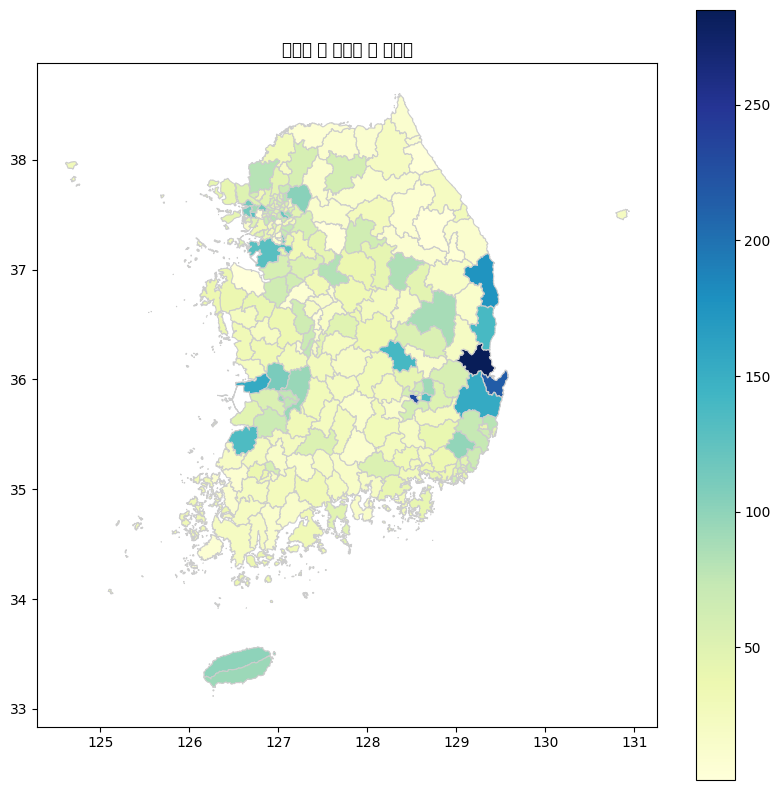

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(merged_df, geometry='geometry')

# 지도 시각화
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(column='num', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# 플롯 타이틀 설정
plt.rc('font',family='Malgun Gothic')
plt.title('시군구 별 대피소 수 시각화')

# 시각화 결과 출력
plt.show()

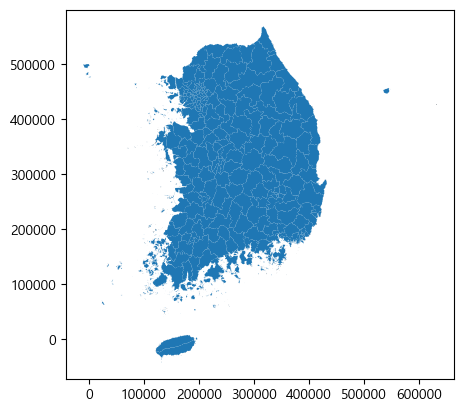

,sigungu_name,geometry,num
0,종로구,"POLYGON ((197800.769 459064.245, 197782.531 45...",45
1,중구,"POLYGON ((202043.969 452491.141, 202063.481 45...",159
2,중구,"POLYGON ((385275.815 181902.566, 385279.932 18...",159
3,중구,"POLYGON ((343051.247 265699.895, 343066.288 26...",159
4,중구,"MULTIPOLYGON (((156530.256 428772.970, 156529....",159
...,...,...,...
222,함양군,"POLYGON ((262942.625 251386.347, 262988.676 25...",27
223,거창군,"POLYGON ((279721.703 267959.396, 279709.755 26...",14
224,합천군,"POLYGON ((299267.853 259812.934, 299302.987 25...",29
225,제주시,"MULTIPOLYGON (((122486.880 -23074.870, 122485....",95


In [11]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


bound = gpd.read_file('shp_file\\Z_SOP_BND_SIGUNGU_PG.shp', encoding='cp949')
bound.rename(columns={'SIGUNGU_NM':'sigungu_name'}, inplace=True)
boundary = bound[['sigungu_name', 'geometry']].set_index('sigungu_name')
shelter = pd.read_csv('csv_file/대피.csv')
shelter_num = shelter.sigungu_name.value_counts()
shelter_ = pd.DataFrame({'sigungu_name': shelter_num.index, 'num': shelter_num.values})
merged = boundary.merge(shelter_, on='sigungu_name') # 두 df 합치기(여기서 폭망)
boundary.to_csv('boundary_sigungu.csv', index=False, encoding='utf-8')

boundary.plot() #구획 시각화
plt.show()
merged

```python
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

bound = gpd.read_file('shp_file\\sig.shp', encoding='cp949')
bound.rename(columns={'SIG_KOR_NM':'sigungu_name'}, inplace=True)

boundary = bound[['sigungu_name', 'geometry']]
boundary.tail()
boun = gpd.read_file('shp_file\\서울시구경계.shp', encoding='cp949')
shelter = pd.read_csv('csv_file\\대피.csv')
shelter_num = shelter.sigungu_name.value_counts()
shelter_ = pd.DataFrame({'sigungu_name': shelter_num.index, 'num': shelter_num.values})
merged = boundary.merge(shelter_, on='sigungu_name') # 두 df 합치기(여기서 폭망)
boundary.to_csv('boundary_sigungu.csv', index=False, encoding='utf-8')
map.tail()
shelter_.to_csv('대피소수.csv', index=False, encoding='utf-8')
```
<span style = "color : red">sig.shp, 서울시구경계.shp file not found!</span>

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

bound = gpd.read_file('shp_file\\sig.shp', encoding='cp949')
bound.rename(columns={'SIG_KOR_NM':'sigungu_name'}, inplace=True)

boundary = bound[['sigungu_name', 'geometry']]
boundary.tail()
boun = gpd.read_file('shp_file\\서울시구경계.shp', encoding='cp949')
shelter = pd.read_csv('csv_file\\대피.csv')
shelter_num = shelter.sigungu_name.value_counts()
shelter_ = pd.DataFrame({'sigungu_name': shelter_num.index, 'num': shelter_num.values})
merged = boundary.merge(shelter_, on='sigungu_name') # 두 df 합치기(여기서 폭망)
boundary.to_csv('csv_file\\boundary_sigungu.csv', index=False, encoding='utf-8')
map.tail()
shelter_.to_csv('csv_file\\대피소수.csv', index=False, encoding='utf-8')

In [ ]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

bound = gpd.read_file('shp_file\\Z_SOP_BND_SIGUNGU_PG.shp', encoding='cp949')
bound.rename(columns={'SIGUNGU_NM':'sigungu_name'}, inplace=True)

boundary = bound[['sigungu_name', 'geometry']]
shelter = pd.read_csv('./대피.csv')
shelter_num = shelter.sigungu_name.value_counts()
shelter_ = pd.DataFrame({'sigungu_name': shelter_num.index, 'num': shelter_num.values})
shelter_['sigungu_name']
merged = boundary.merge(shelter_, on='sigungu_name')
boundary.to_csv('csv_file\\boundary_sigungu.csv', index=False, encoding='utf-8')
bound

In [12]:
import pandas as pd
import folium

# 데이터프레임 생성 (예시)
shelter = pd.read_csv('csv_file\\shelterloc.csv')


# 사용자 입력 받기
input_sigungu_name = input("시군구 이름을 입력하세요: ")

# 선택된 시군구에 해당하는 행 선택
selected_rows = shelter[shelter['sigungu_name'] == input_sigungu_name]
selected_rows['lat'] = selected_rows['lat'].astype(float)
selected_rows['lon'] = selected_rows['lon'].astype(float)
# 중심 좌표 설정
center_lat = selected_rows['lat'].mean()
center_lon = selected_rows['lon'].mean()

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# 선택된 시군구의 모든 위치에 마커 추가
for index, row in selected_rows.iterrows():
    folium.Marker(location=[row['lat'], row['lon']], popup=row['sigungu_name']).add_to(m)

# 지도 출력
m

시군구 이름을 입력하세요: 노원구


C:\Users\padagi\AppData\Local\Temp\ipykernel_24768\3541915907.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['lat'] = selected_rows['lat'].astype(float)
C:\Users\padagi\AppData\Local\Temp\ipykernel_24768\3541915907.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['lon'] = selected_rows['lon'].astype(float)
